**Arboles de Decision** 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [188]:
#cargamos el Dataset y ostramos las 5 primeras filas 
Datos = pd.read_csv('./winequality-red.CSV')
Datos.head(80)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.9986,3.54,0.66,10.5,5
76,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.9986,3.54,0.66,10.5,5
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.9966,3.52,0.55,10.7,6
78,6.7,0.750,0.12,2.0,0.086,12.0,80.0,0.9958,3.38,0.52,10.1,5


In [189]:
Datos.shape

(1599, 12)

In [190]:
Datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [199]:
Datos.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([4., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ]),
 <BarContainer object of 10 artists>)

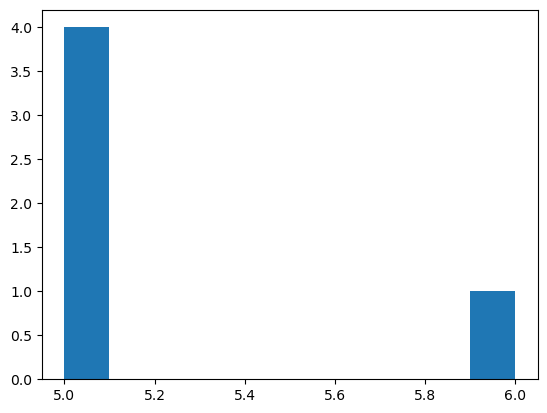

In [200]:
plt.hist(Datos.quality)

In [201]:
Datos = {
    'fixed acidity': [7.4, 7.8, 7.8, 11.2, 7.4],
    'volatile acidity': [0.70, 0.88, 0.76, 0.28, 0.70],
    'citric acid': [0.00, 0.00, 0.04, 0.56, 0.00],
    'residual sugar': [1.9, 2.6, 2.3, 1.9, 1.9],
    'chlorides': [0.076, 0.098, 0.092, 0.075, 0.076],
    'free sulfur dioxide': [11.0, 25.0, 15.0, 17.0, 11.0],
    'total sulfur dioxide': [34.0, 67.0, 54.0, 60.0, 34.0],
    'density': [0.9978, 0.9968, 0.9970, 0.9980, 0.9978],
    'pH': [3.51, 3.20, 3.26, 3.16, 3.51],
    'sulphates': [0.56, 0.68, 0.65, 0.58, 0.56],
    'alcohol': [9.4, 9.8, 9.8, 9.8, 9.4],
    'quality': [5, 5, 5, 6, 5]}

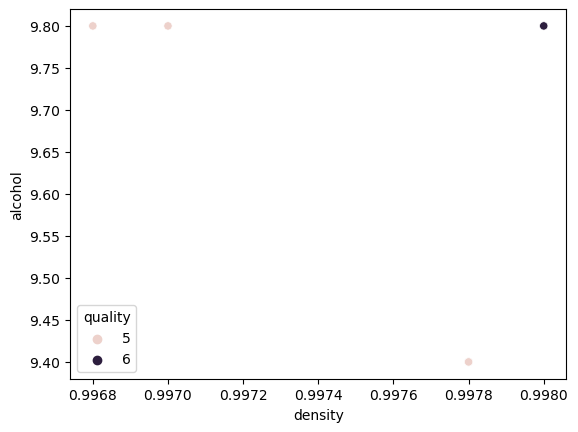

In [202]:
sns.scatterplot(x="density", y="alcohol", hue="quality", data=Datos)
plt.show()

In [203]:
predictors_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']

In [204]:
# Carga los datos en un DataFrame
Datos = {
    'fixed acidity': [7.4, 7.8, 7.8, 11.2, 7.4],
    'volatile acidity': [0.70, 0.88, 0.76, 0.28, 0.70],
    'citric acid': [0.00, 0.00, 0.04, 0.56, 0.00],
    'residual sugar': [1.9, 2.6, 2.3, 1.9, 1.9],
    'chlorides': [0.076, 0.098, 0.092, 0.075, 0.076],
    'quality': [5, 5, 5, 6, 5]}

In [205]:
Datos = pd.DataFrame(Datos)

In [206]:
# Accede a las columnas predictoras utilizando la lista de columnas
predictors = Datos[predictors_cols]

In [207]:
# Accede a la columna target
target_col = 'quality'
target = Datos[target_col]

In [208]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides
0,7.4,0.70,0.00,1.9,0.076
1,7.8,0.88,0.00,2.6,0.098
2,7.8,0.76,0.04,2.3,0.092
3,11.2,0.28,0.56,1.9,0.075
4,7.4,0.70,0.00,1.9,0.076


In [209]:
target

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [210]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides
fixed acidity,1.000000,-0.906283,0.994920,-0.275990,-0.322814
volatile acidity,-0.906283,1.000000,-0.943763,0.654122,0.680229
citric acid,0.994920,-0.943763,1.000000,-0.368253,-0.409028
residual sugar,-0.275990,0.654122,-0.368253,1.000000,0.989394
chlorides,-0.322814,0.680229,-0.409028,0.989394,1.000000


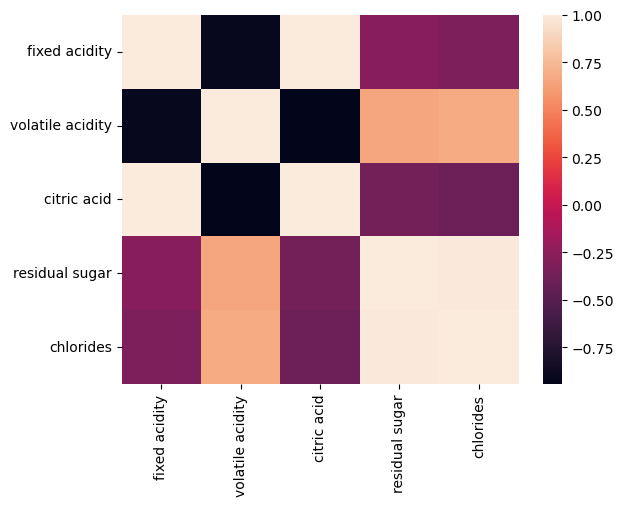

In [211]:
sns.heatmap(corr)
plt.show()

In [212]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=2, random_state=2)

In [213]:
tree =DecisionTreeClassifier()

In [214]:
arbol =tree.fit(X_train, y_train)

[Text(0.5, 0.75, 'x[1] <= 0.49\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

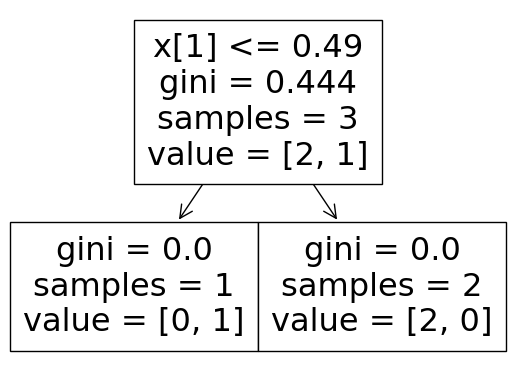

In [215]:
plot_tree(arbol)

In [216]:
predicciones = arbol.predict(X_test)

In [217]:
predicciones

array([5, 5], dtype=int64)

In [218]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\ok\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4772\54210796.py", line 1, in <module>
    pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4772\54210796.py", line 1, in <listcomp>
    pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])
                          ~^^^
TypeError: 'int' object is not subscriptable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\ok\Lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structur

In [219]:
print(y_test)

2    5
4    5
Name: quality, dtype: int64


In [220]:
pd.crosstab(np.array(y_test), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,5
Actual,
5,2


In [223]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

1.0